<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data Analytics & Machine learning

Lecturers: Aimée Lynn Backiel, Kenric Borgelioen, Sofie Torfs, Lies Bollens

Academic year 2025-2026

## Lab 3: Data analytics with Pandas

### Recap of last lab(s)

#### Lab 1

1. We ensured we had a valid Python installation.
2. We learnt what a virtual environment is:
   * Isolated Python executable and packages.
   * We created a virtual environment.
3. Absolute path vs relative path recap.
4. Recap of data structures in Python

#### Lab 2
1. Installed Pandas
2. Learnt how to read data
3. Learnt how to calculate mean, mode, median etc.
4. Basic exploration of the 4 variables
5. Bivariate exploration

### The case

Ada Turing Travelogue, or as everyone calls her, Ada just started working part time at her parents travel agency. She has a keen understanding and interest of everything related to applied computer science ranging from server & system management to full stack software development. Through database foundations she already understands how to query data and programming 1 and 2 covered the essentials about the Python programming language. Recently she has just decided to start learning about data analytics & machine learning as well.

She uses her skills to connect to the travel agency's database where she finds many, normalized, tables. Ada recalls what she learnt in database foundations and performs all the correct joins. Afterwards she saves the data in the `data/` folder.


She finds the following dataset:

| Column Name          | Description                                                                                       |
| -------------------- | ------------------------------------------------------------------------------------------------- |
| SalesID              | Unique identifier for each sale.                                                                  |
| Age                  | Age of the traveler.                                                                              |
| Country              | Country of origin of the traveler.                                                                |
| Membership_Status    | Membership level of the traveler in the booking system; could be 'standard', 'silver', or 'gold'. |
| Previous_Purchases   | Number of previous bookings made by the traveler.                                                 |
| Destination          | Travel destination chosen by the traveler.                                                        |
| Stay_length          | Duration of stay at the destination.                                                              |
| Guests               | Number of guests traveling (including the primary traveler).                                             |
| Travel_month         | Month in which the travel is scheduled.                                                           |
| Months_before_travel | Number of months prior to travel that the booking was made.                                       |
| Earlybird_discount   | Boolean flag indicating whether the traveler received an early bird discount.                     |
| Package_Type         | Type of travel package chosen by the traveler.                                                    |
| Cost                 | Calculated cost of the travel package.                                                            |
| Margin | The cost (for the traveler) - what the travel agency pays. |
 | Additional_Services_Cost| The amount of additional services (towels, car rentals, room service, ...) that was bought during the trip. |


### Helping Ada explore the dataset

The main goal for the remainder of this lab is to explore the data. We will specifically take five columns:

* cost
* age
* stay_length
* destination
* country

Our goal is to find interesting relationships between them.

As was covered in the book and lecture there are two main data types in analytics: categorical and numerical data. This is a crucial first step in your analysis because it determines what methods make sense on your data.


**The goal is primarily to find out what influences the cost of the stay.**

### Part 1: Recap from last week

#### Reading and exploring data: univariate

In [1]:
import pandas as pd # by convention
pd.options.display.float_format = '{:.2f}'.format

In [2]:
travel_dataset = pd.read_csv("data/lab_3_dataset.csv")

Let's have a very short refresher of last week's lab. One of the first things you typically do with a dataset is print out the first few rows. 

In [3]:
travel_dataset.head()

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09


Accessing the columns is equally trivial.

In [4]:
travel_dataset.columns

Index(['Unnamed: 0', 'sales_id', 'age', 'country', 'membership_status',
       'previous_purchases', 'destination', 'stay_length', 'guests',
       'travel_month', 'months_before_travel', 'earlybird_discount',
       'package_Type', 'cost', 'rating', 'margin', 'additional_services_cost'],
      dtype='object')

We can also make subsets like this:

In [5]:
columns = ["country", "stay_length", "age", "cost", "destination"]
travel_dataset_subset = travel_dataset[columns]
travel_dataset_subset

,country,stay_length,age,cost,destination
0,UK,4,47,1706.09,Sydney
1,Italy,4,37,281233.19,Tokyo
2,USA,3,49,2829.92,Sydney
3,Spain,7,62,2789.53,Cape Town
4,Germany,9,36,5358.00,Paris
...,...,...,...,...,...
9995,Germany,11,59,7504.78,Cape Town
9996,Australia,6,18,1427.12,Sydney
9997,USA,5,29,3458.86,Paris
9998,USA,16,47,18392.27,Paris


##### ❓ Summarize all the numerical variables with one line of code. Write down everything you notice about the variable cost.

In [6]:
travel_dataset.describe()

,Unnamed: 0,sales_id,age,previous_purchases,stay_length,guests,travel_month,months_before_travel,cost,rating,margin,additional_services_cost
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4999.50,5000.50,39.98,3.48,10.49,2.48,5.89,3.55,114814.74,6.21,5178.09,1159.00
std,2886.90,2886.90,14.00,1.89,7.05,1.16,3.70,3.05,457712.61,0.95,4812.32,1112.08
min,0.00,1.00,18.00,0.00,1.00,1.00,1.00,1.00,-1000000.00,4.00,-432.80,-48.64
25%,2499.75,2500.75,29.00,2.00,5.00,2.00,2.00,1.00,2414.47,5.00,1812.32,417.60
50%,4999.50,5000.50,39.00,3.00,9.00,2.00,6.00,3.00,4845.14,6.00,3763.09,824.55
75%,7499.25,7500.25,50.00,5.00,14.00,3.00,8.00,5.00,10222.98,7.00,6930.93,1522.11
max,9999.00,10000.00,80.00,13.00,68.00,5.00,12.00,28.00,6724039.17,9.00,51197.51,10991.20


There is a large difference between the mean and median cost. This is likely an indication of outliers. We will have to investigate this further. Cost also has a large negative value, while it's supposed to be strictly positive.

##### ❓ Summarize one of the categorical variables.

In [7]:
travel_dataset["country"].value_counts()

country
UK           1320
Italy        1274
USA          1267
France       1266
Spain        1265
Australia    1222
Canada       1214
Germany      1172
Name: count, dtype: int64

### Part 2: Data exploration - bivariate


Now we will look at pairs of variables, to see if we find any interesting relations between two variables. This analysis takes multiple steps.
1) First, you decide which two variables might be interesting to look at together
2) Second, you have to decide upon a technique for analysis. This technique will differ depending on the type of variable. The different combinations are: two numerical variables, two categorical variables and one categorical and one numerical variable. 
3) Depending on the type of variables, you can carry out different analysis. We will explore this below, with one example for each type, to give you an idea of what different analysis looks like for different types of variables. 

Later, when you encounter two other variables you want to analyse, you can use these examples as a blueprint to start carrying out the correct analysis. 

##### ❓ Which variables do you think are interesting to take a look at together?  Write a short motivation on why you would like to look at them and why you chose this technique to analyse this. Then carry out the proper analysis. Choose at least three different combinations: two categorical, two numerical, and one categorical and a numerical variable. Don't lose sight of what we are trying to figure out: what influences the cost of the stay. End your answer with what you observe from your analysis.



##### 1) Two numerical variables:
- Why do you look at them? 
- What technique do you use and why? 


Motivation: when studying the relation between numerical variables, we often use the correlation. We would like to see whether there is a relation between age and cost, to see if older people possibly spend more on vacations compared to younger people.

In [8]:
travel_dataset[["age", "cost"]].corr()

,age,cost
age,1.00,0.03
cost,0.03,1.00


The correlation between age and cost is close to zero. We therefore expect almost no linear relation between those variables

##### 2) One numerical variable and one categorical variable: 

- Why do you look at them? 
- What technique do you use and why? 

We would like to see if cost differs between countries, to study whether people from different countries spend different amounts. We will use the groupby method to summarize cost by country.

In [9]:
travel_dataset[["country", "cost"]].groupby("country").agg(["min", "max", "median", "mean", "std"])

cost                                       
                  min        max  median      mean       std
country                                                     
Australia -1000000.00 6057070.02 4694.58 101492.50 474654.60
Canada    -1000000.00 3449114.18 4773.98 113657.72 408087.20
France    -1000000.00 5190741.80 5439.27 111611.85 421794.17
Germany   -1000000.00 5997567.85 5158.53 118083.26 482499.12
Italy     -1000000.00 6724039.17 4771.74 109234.36 469405.25
Spain     -1000000.00 3933809.07 4708.53 114290.41 437963.46
UK        -1000000.00 3891507.65 4796.86 122519.59 462446.30
USA       -1000000.00 5945497.65 5181.35 127056.91 498384.78

We notice something very strange. The min of the cost is negative, and the max of the cost is very high. The median and the mean differ tremendously from eachother, which suggest possible outliers on the higher side. We begin to suspect there might be some data issues occurring.

##### 3 ) Two categorical variables:

- Why do you look at them? 
- What technique do you use and why? 

We would like to see if there are journeys that are made less frequently, so maybe we can focus our ads on those. We therefore look at the combination of country and destination by making a cross table.

In [10]:
pd.crosstab(travel_dataset['country'], travel_dataset['destination'], margins=True)

destination,Cairo,Cape Town,New York,Paris,Rio,Rome,Sydney,Tokyo,All
country,,,,,,,,,
Australia,151,158,169,135,158,162,149,140,1222
Canada,154,149,142,153,184,138,141,153,1214
France,159,152,134,171,159,155,159,177,1266
Germany,152,139,147,161,152,126,150,145,1172
Italy,182,165,157,149,146,158,176,141,1274
Spain,144,165,152,163,155,159,168,159,1265
UK,173,156,166,166,173,150,172,164,1320
USA,156,140,162,161,166,149,160,173,1267
All,1271,1224,1229,1259,1293,1197,1275,1252,10000


##### ❓ Extra: Some students asked if it was possible to find the min and max in a cross table more easily. You could use the methods found below to do so, if you are interested.

In [11]:
counts = travel_dataset[["country", "destination"]].value_counts()

# Get the combination (as a tuple) with the lowest count
min_combination = counts.idxmin()

# Get the corresponding min count
min_count = counts.min()


# Get the combination (as a tuple) with the highest count
max_combination = counts.idxmax()

# Get the corresponding max count
max_count = counts.max()

print(f"Least frequent combination: {min_combination} with {min_count} occurrences")
print(f"Most frequent combination: {max_combination} with {max_count} occurrences")

Least frequent combination: ('Germany', 'Rome') with 126 occurrences
Most frequent combination: ('Canada', 'Rio') with 184 occurrences


In [12]:
ct = pd.crosstab(travel_dataset['country'], travel_dataset['destination'])

# Get the position with the lowest/highest count
min_pos = ct.stack().idxmin()
max_pos = ct.stack().idxmax()

print("Min value:", ct.loc[min_pos], "at", min_pos)
print("Max value:", ct.loc[max_pos], "at", max_pos)

Min value: 126 at ('Germany', 'Rome')
Max value: 184 at ('Canada', 'Rio')


We can now see that most people travel from Canada to Rio. The least popular journey is from Germany to Rome. Overall, the differences between the different countries and destinations is small.

##### ❓ Extra: I'd like to study age and cost using the groupby method. Is that a good idea? Explain why or why not. If not, do you see a way to make it work?




This is not a good idea, because you will get a value for every different age. There is no oversight at all. A good way to solve this, is by "binning" the ages into age categories.

In [13]:
# Define bins (edges)
bins = [17, 35, 50, 65, 100]   # e.g., age groups
labels = ['18-35', '36-50', '51-65', '66-100']

# Create binned column
travel_dataset['age_group'] = pd.cut(travel_dataset['age'], bins=bins, labels=labels, right=True)

travel_dataset[["age_group", "cost"]].groupby("age_group").agg(["min", "max", "median", "mean"])



C:\Users\u0138685\AppData\Local\Temp\ipykernel_27380\1719083092.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  travel_dataset[["age_group", "cost"]].groupby("age_group").agg(["min", "max", "median", "mean"])


cost                             
                  min        max  median      mean
age_group                                         
18-35     -1000000.00 6724039.17 4789.60 102343.01
36-50     -1000000.00 6057070.02 4872.23 112593.78
51-65     -1000000.00 4365154.33 5225.93 138350.05
66-100         196.74 3367020.44 4814.27 147894.18

##### ❓ If you have not done so before, analyze cost per destination. Do you notice any abnormal results?


In [14]:
travel_dataset[["destination", "cost"]].groupby("destination").agg(["min", "max", "median", "mean"])

cost                               
                    min        max    median      mean
destination                                           
Cairo       -1000000.00   43707.46   4216.37  -3599.38
Cape Town   -1000000.00   30977.86   4102.03  -7622.93
New York    -1000000.00   50263.48   4534.42  -2176.54
Paris       -1000000.00   48416.78   4656.95  -3527.71
Rio         -1000000.00   41355.67   3961.99  -4781.88
Rome        -1000000.00   56969.50   4209.89  -3456.09
Sydney      -1000000.00   36791.09   3989.17  -4994.68
Tokyo       -1000000.00 6724039.17 706551.82 947170.23

* The values for Tokyo are a lot higher. 

* There seems to be a large negative number for the minimum.

##### ❓ How would you deal with this?

* The large negative number is likely some sort of incorrect data, we will try to clean it.
  
* For the values of Tokyo, we will ask a business expert what might be going on.

### Part 3:  Subsetting and cleaning data

Ada gets confirmation from her contacts that the data has some issues. The booking system broke down and produced large negative values. Additionally, the currency converter for Tokyo is giving incorrect results. The currency conversion step failed to be applied for the trips to Tokyo. At the time of recording, in March 2025, the conversion rate between Euro and Yen was `1 Euro = 158 Yen`. 

We will help her rectify these mistakes.

#####  Removing data: boolean indexing

Generally it's a good idea to not alter your original dataset but filter it in a copy. The way Pandas does this is by filtering with a boolean mask. We will demonstrate step by step how to do this.

<center>
<img src="https://numpy.org/doc/stable/_images/broadcasting_1.png" style="background-color:white;">
</center>

The data we want gone are the rows where the cost equals `-1000000.00`. We can check for each row if that's the case. 

Pandas uses a technique called "broadcasting" where if you try to do operations between values of different shapes Pandas will try to expand one to make them match. 

This means you don't need to explicitly turn the value into an array of the same size.

In [15]:
non_errors = travel_dataset["cost"] != -1000000.00
non_errors

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: cost, Length: 10000, dtype: bool

❓ Check how many non_errors we have in the dataset

In [16]:
len(travel_dataset[non_errors])

9900

❓ Is explicitly checking if the cost does not equal -1000000.00 the best way to filter out wrong cost values? Adapt the checking for non_errors to a more logical constraint. See if we still have the same number of errors.

In [17]:
non_errors_positive = travel_dataset["cost"] > 0
len(travel_dataset[non_errors_positive])

9900

Given that it is a cost, it makes more sense to put the restraint that it should be positive. Then we automatically also filter out other error values, should they exist, and then you don't need to look for them specifically. We can check with this function:

In [18]:
# errors 
amount_of_errors = len(non_errors) - non_errors.sum()
# errors positive
amount_of_errors_positive = len(non_errors_positive) - non_errors_positive.sum()

print(f"Amount of errors (cost = -1000000): {amount_of_errors}, Amount of errors (cost <= 0): {amount_of_errors_positive}")
if amount_of_errors != amount_of_errors_positive:
    print("There are other faulty cost values in the dataset that we would like to filter out.")
else:
    print("There are no other faulty cost values in the dataset that we would like to filter out.")


Amount of errors (cost = -1000000): 100, Amount of errors (cost <= 0): 100
There are no other faulty cost values in the dataset that we would like to filter out.


Pandas allows you to give a boolean array as an index to filter out rows. The rows where the boolean array (also known as a mask) is `True` are kept. 

In [19]:
travel_dataset[non_errors] 

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost,age_group
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06,36-50
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52,36-50
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36,36-50
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53,51-65
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,59,Germany,standard,3,Cape Town,11,3,8,1,True,Adventure,7504.78,7,7045.05,1602.18,51-65
9996,9996,9997,18,Australia,standard,1,Sydney,6,1,7,1,True,Relaxation,1427.12,7,1051.24,395.36,18-35
9997,9997,9998,29,USA,silver,3,Paris,5,3,12,2,True,Adventure,3458.86,5,2945.36,539.41,18-35
9998,9998,9999,47,USA,standard,5,Paris,16,5,8,3,False,Relaxation,18392.27,5,17968.59,5247.25,36-50


We can also combine all of the above in one line, to directly filter out all the values with a faulty cost 

In [20]:
travel_dataset[travel_dataset["cost"] > 0]

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost,age_group
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06,36-50
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52,36-50
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36,36-50
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53,51-65
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,59,Germany,standard,3,Cape Town,11,3,8,1,True,Adventure,7504.78,7,7045.05,1602.18,51-65
9996,9996,9997,18,Australia,standard,1,Sydney,6,1,7,1,True,Relaxation,1427.12,7,1051.24,395.36,18-35
9997,9997,9998,29,USA,silver,3,Paris,5,3,12,2,True,Adventure,3458.86,5,2945.36,539.41,18-35
9998,9998,9999,47,USA,standard,5,Paris,16,5,8,3,False,Relaxation,18392.27,5,17968.59,5247.25,36-50


##### ❓create a new dataset called `_dataset_cleaned` , which contains only the rows with a non faulty value. Make a copy of the original dataset, such that we do not accidentally alter values in the original dataset 

In [21]:
_dataset_cleaned = travel_dataset[non_errors].copy()

##### ❓ Make a mask for the people that traveled to Tokyo. Call the variable `tokyo`.

In [22]:
tokyo = _dataset_cleaned["destination"] == "Tokyo"

#####  Updating rows the right way

We can now grab the rows where the destination is Tokyo as follows

In [23]:
_dataset_cleaned[tokyo]

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost,age_group
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52,36-50
6,6,7,63,Italy,silver,4,Tokyo,1,1,6,1,False,Cultural,37424.42,7,-89.33,81.53,51-65
7,7,8,51,Spain,silver,3,Tokyo,11,2,7,3,True,Adventure,810452.74,5,4882.30,1509.58,51-65
11,11,12,33,Australia,standard,3,Tokyo,4,3,7,5,True,Adventure,445455.58,7,2574.81,738.01,18-35
27,27,28,45,Spain,silver,4,Tokyo,19,3,2,11,True,Relaxation,1796515.55,6,11144.05,3772.01,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,9936,9937,44,Australia,gold,5,Tokyo,2,2,8,14,True,Cultural,143747.78,8,798.81,123.23,36-50
9958,9958,9959,49,Australia,standard,1,Tokyo,9,1,8,3,False,Adventure,320119.76,6,1727.44,702.34,36-50
9965,9965,9966,47,Spain,standard,2,Tokyo,5,2,2,1,False,Adventure,324200.00,5,1661.63,494.94,36-50
9986,9986,9987,34,Italy,standard,3,Tokyo,5,3,12,8,False,Relaxation,535010.48,6,3011.18,875.61,18-35


This gives us a filtered dataset of all people that traveled to Tokyo, with the faulty values already removed.
We can take a look at the cost column as follows

In [24]:
_dataset_cleaned[tokyo]["cost"]

1       281233.19
6        37424.42
7       810452.74
11      445455.58
27     1796515.55
          ...    
9936    143747.78
9958    320119.76
9965    324200.00
9986    535010.48
9991     67273.96
Name: cost, Length: 1239, dtype: float64

Now we have the rows we can convert the currency by dividing by 158, to get the correct price. 
You will likely try to do this in the following way:

`_dataset_cleaned[tokyo]["cost"] /= 158`

You can try it out below and look at the result

In [25]:
_dataset_cleaned[tokyo]["cost"] /= 158

C:\Users\u0138685\AppData\Local\Temp\ipykernel_27380\740947496.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  _dataset_cleaned[tokyo]["cost"] /= 158
C:\Users\u0138685\AppData\Local\Temp\ipykernel_27380\740947496.py:1: SettingWithCopyWar

This gives us the same error as we encountered in the previous session. The way we can get around is is by using `data.loc`.

When we read the error message, it tells us two things: 
1) The abovementioned code currently still works in certain cases, but in the future it will not work anymore. 

*This is a sure sign that we should not use this line of code anymore. If we would, in the future, it might suddenly break and not function anymore. Right now, we know where we are coding and can easily update this line of code. But, in the future, we might have a whole project with 1000s of lines of code. If you then have to look for where exactly the error occurs, you will end up spending a long time doing something not very fun. Think about future you.*

2) to use  `df.loc[row_indexer, "col"] = values` instead, since this will ensure we **keep on updating the original dataframe**. 



`df.loc` can be quite confusing. It is an object you can slice by using square brackets `[]`. The first element is the **index**. This is typically the column on the far left.

In [26]:
_dataset_cleaned.index # Each dataframe has an index, which is shown on the left. It typically starts at 0 and goes to the number of rows - 1.

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=9900)

In [27]:
tokyo.index # Each series has an index too

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=9900)

In [28]:
_dataset_cleaned.loc[tokyo] # Loc filters the dataset where tokyo is true  

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost,age_group
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52,36-50
6,6,7,63,Italy,silver,4,Tokyo,1,1,6,1,False,Cultural,37424.42,7,-89.33,81.53,51-65
7,7,8,51,Spain,silver,3,Tokyo,11,2,7,3,True,Adventure,810452.74,5,4882.30,1509.58,51-65
11,11,12,33,Australia,standard,3,Tokyo,4,3,7,5,True,Adventure,445455.58,7,2574.81,738.01,18-35
27,27,28,45,Spain,silver,4,Tokyo,19,3,2,11,True,Relaxation,1796515.55,6,11144.05,3772.01,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,9936,9937,44,Australia,gold,5,Tokyo,2,2,8,14,True,Cultural,143747.78,8,798.81,123.23,36-50
9958,9958,9959,49,Australia,standard,1,Tokyo,9,1,8,3,False,Adventure,320119.76,6,1727.44,702.34,36-50
9965,9965,9966,47,Spain,standard,2,Tokyo,5,2,2,1,False,Adventure,324200.00,5,1661.63,494.94,36-50
9986,9986,9987,34,Italy,standard,3,Tokyo,5,3,12,8,False,Relaxation,535010.48,6,3011.18,875.61,18-35


In [29]:
_dataset_cleaned.loc[tokyo, "cost"]

1       281233.19
6        37424.42
7       810452.74
11      445455.58
27     1796515.55
          ...    
9936    143747.78
9958    320119.76
9965    324200.00
9986    535010.48
9991     67273.96
Name: cost, Length: 1239, dtype: float64

It is a good habit to make a copy before you change your data. If you don't do this and make a mistake you need to rerun your entire script. For a small dataset like this it's not a big problem, but as you scale it can become a bottleneck.

In [30]:
cleaned_dataset = _dataset_cleaned.copy()

In [31]:

cleaned_dataset.loc[tokyo, "cost"] /= 158

In [32]:
_dataset_cleaned

,Unnamed: 0,sales_id,age,country,membership_status,previous_purchases,destination,stay_length,guests,travel_month,months_before_travel,earlybird_discount,package_Type,cost,rating,margin,additional_services_cost,age_group
0,0,1,47,UK,silver,1,Sydney,4,2,7,1,False,Adventure,1706.09,6,1219.74,291.06,36-50
1,1,2,37,Italy,silver,5,Tokyo,4,2,8,4,False,Adventure,281233.19,7,1570.39,405.52,36-50
2,2,3,49,USA,standard,2,Sydney,3,4,7,1,False,Cultural,2829.92,6,2360.49,285.36,36-50
3,3,4,62,Spain,silver,2,Cape Town,7,2,1,3,True,Adventure,2789.53,7,2315.66,747.53,51-65
4,4,5,36,Germany,silver,3,Paris,9,3,2,7,False,Adventure,5358.00,5,5042.14,1117.09,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,59,Germany,standard,3,Cape Town,11,3,8,1,True,Adventure,7504.78,7,7045.05,1602.18,51-65
9996,9996,9997,18,Australia,standard,1,Sydney,6,1,7,1,True,Relaxation,1427.12,7,1051.24,395.36,18-35
9997,9997,9998,29,USA,silver,3,Paris,5,3,12,2,True,Adventure,3458.86,5,2945.36,539.41,18-35
9998,9998,9999,47,USA,standard,5,Paris,16,5,8,3,False,Relaxation,18392.27,5,17968.59,5247.25,36-50


We can also give columns or a list of columns to `.loc`. In this case only the rows we ask for will be returned

In [33]:
_dataset_cleaned.loc[tokyo, "cost"]

1       281233.19
6        37424.42
7       810452.74
11      445455.58
27     1796515.55
          ...    
9936    143747.78
9958    320119.76
9965    324200.00
9986    535010.48
9991     67273.96
Name: cost, Length: 1239, dtype: float64

It is a good habit to make a copy before you change your data. If you don't do this and make a mistake you need to rerun your entire script. For a small dataset like this it's not a big problem, but as you scale it can become a bottleneck.


##### ❓ create a new copy of the dataset, called `cleaned_dataset`. Use the df.loc function to divide the cost of the trips to Tokyo by 158. 



In [34]:
cleaned_dataset = _dataset_cleaned.copy() # copy the cleaned dataset to a new variable


cleaned_dataset.loc[tokyo, "cost"] /= 158 # use loc to update the cost for Tokyo trips

# Check if it worked
cleaned_dataset.loc[tokyo, "cost"].describe()

count    1239.00
mean     6124.05
std      5591.10
min        94.29
25%      2293.94
50%      4566.32
75%      8038.30
max     42557.21
Name: cost, dtype: float64

##### ❓We will briefly look at the impact of what we did on our analysis of cost by destination. What effect did our corrections have on the data?

In [35]:
cleaned_dataset[["destination", "cost"]].groupby("destination").agg(["min", "max", "median", "mean", "std"])

cost                                 
               min      max  median    mean     std
destination                                        
Cairo       286.53 43707.46 4342.23 5897.69 5300.76
Cape Town   236.15 30977.86 4132.99 5521.14 4677.70
New York    104.24 50263.48 4576.78 6009.05 5394.53
Paris       169.12 48416.78 4708.07 6061.44 5078.72
Rio         190.22 41355.67 4003.00 5325.80 4614.33
Rome        180.58 56969.50 4234.08 5786.73 5081.94
Sydney      114.02 36791.09 4053.77 5254.98 4355.73
Tokyo        94.29 42557.21 4566.32 6124.05 5591.10

We can see that all values are now positive. The prices of vacations to Tokyo are now way more in line with the others. The data seems more realistic now.

##### ❓Compare the correlation between age, cost and stay length before and after data cleaning.What differences do you see?

In [36]:
travel_dataset[["age", "cost", "stay_length"]].corr()

,age,cost,stay_length
age,1.00,0.03,0.00
cost,0.03,1.00,0.22
stay_length,0.00,0.22,1.00


In [37]:
cleaned_dataset[["age", "cost", "stay_length"]].corr()

,age,cost,stay_length
age,1.00,0.02,0.00
cost,0.02,1.00,0.75
stay_length,0.00,0.75,1.00


The correlation between cost and stay length went threefold, from 0.22 to 0.75


##### ❓ How do we interpret these correlations? Why do you think the correlations changed so much? 

A large, positive correlation means that when cost goes up, so does stay length, generally speaking. The same is true in the other direction. Before data cleansing, there were some very large negative and some very large positive values. These outliers completely changed the correlation and had a big impact. The new correlation, which is 0.75, is a much stronger value. Logically, it makes sense that there is a relatively high correlation between the length of the stay and the cost, so we are happy to see this reflected in the data. If there were a very low correlation between stay_length and cost, this would be a strange result that would warrant extra investigation. 

Extra food for thought: 
- correlation only gives a measure of linear relationships. Low correlations don't always mean an absence of a relationship, it could be there but just non-linear.
- a correlation measures the fact that there is **a** linear relationship. However, how exactly to interpret these numbers is not necessarily straightforward. 


How do we interpret our correlation value of 0.75?

**What correlation does NOT mean**
> If variable A increases with 1 unit variable B increases with 0.75 units.

**Why is this not the interpretation?** 

The (sample) correlation $r_{X,Y}$ is given as:

$$
r_{x,y} = \frac{cov(x,y)}{(n-1)s_{x}s_{y}} = \frac{\sum_{i=1}^{n}{(x_{i} - \bar{x})(y_{i} - \bar{y})}}{(n-1)s_{x}s_{y}}
$$

We have some notation to unpack here.

We have two variables $x$ and $y$. These each have a mean $\bar{x}$ and $\bar{y}$ pronounced as x bar and y bar respectively, $s_{x}$ and $s_{y}$ are respectively the standard deviations of x and y.

The first equality shows us that the correlation $r_{x, y}$ is a normalized version of something called the covariance (cov). The scaling is achieved by dividing by a factor related to the product of the standard deviations of the two variables. This is what ensures that $r_{x,y} \in [-1, 1]$. 

Thee covariance expresses the joint variability of two variables. A covariance of 8 means that if variable x increased by 1 the other variable increases by an amount that is dependent on the units and scale of both variables; it doesn't specify a fixed number of units either.

Thus, the correct interpretation of a correlation coefficient is: 

> A correlation coefficient, measures the strength and direction of a linear relationship between two variables, but not the slope of that relationship.

Finally, to know how much one variable varies in function of the other we can look at the regression slope:

$$
\beta_{y} = r_{x,y}\frac{s_{x}}{s_{y}}
$$

The slope of the regression has a deep connection with the correlation. It's the correlation weighted by the proportion of the standard deviations. Logically, if $s_{x} = s_{y}$ the interpretation given last lecture holds. Generally that is not the case, so those that made this remark last lecture were correct. The equation above shows that it is trivial to recover the slope from the correlation.

It is important to remember that correlations and the slope of a regression are expressing linear relationships. As discussed last lecture Anscombe's quartet consists of four datasets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. **This highlights the importance of visualizing data and not relying solely on statistical metrics.**



<center>
Anscomnbe's quarter: four datasets with an equal correlation.
<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" style="width:50%">
</center>

### Introduction to plotting with Matplotlib, Seaborn and Plotly

*In the next lab we will dive deeper into plotting data. Here, we give a little introduction to plotting data. If you do not have time enough to finish all the content of the lab, it is best to focus on all the content above and let the plotting part be for the moment.* 

We have helped Ada so far to gain insights into her data by wrangling it into shape and making tables to summarize data. Now, to further enhance our understanding and visualize the patterns, trends, and potential anomalies, we will be plotting the data. 

Making data visual simplifies complex datasets and also makes it more intuitive for stakeholders to grasp key takeaways. By transitioning from tabular summaries to graphical plots, we can also communicate more effectively.

#### Matplotlib

<center>
<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" style="background-color:white">
</center>

The name matplotlib comes from matrix plotting library. It's a descendant from the MATLAB programming language. It's by now an older library (2003) that has some quirks, but it is still important to know the basics of Matplotlib since other Python plotting libraries build on top of it. 

In [38]:
# uncomment to install
#%pip install matplotlib 

In [39]:
import matplotlib.pyplot as plt # convention

##### Plotting univariate data


The table below is a summary of the different types of plots for **numeric data**.

| Plot Type          | Description                                           | When to Use                                                      |
|--------------------|-------------------------------------------------------|------------------------------------------------------------------|
| **Histogram**      | Displays the distribution of a single continuous variable by dividing the data into bins and showing the frequency of observations in each bin. | To visualize the distribution of a variable, especially to identify its central tendency (mean), spread (standard deviation), and skewness (are low or high values more common).  |
| **Box Plot (or Whisker Plot)** | Shows the distribution of a variable using quartiles and displays potential outliers. | To get a summary of a variable's distribution in terms of its median, quartiles, and possible outliers. Useful when comparing the distribution across categories. |
| **Density Plot (or Kernel Density Plot)** | Provides a smoothed version of a histogram. | To visualize the distribution of a variable in a continuous manner. Particularly useful when comparing the distributions of multiple variables on the same plot. |
| **Violin Plot**    | Combines aspects of box plots and density plots.       | To visualize both the distribution and summary statistics of a variable. Especially useful when comparing across different categories. |


The syntax for plotting is generally `plt.<plotType>(x, y)`. 

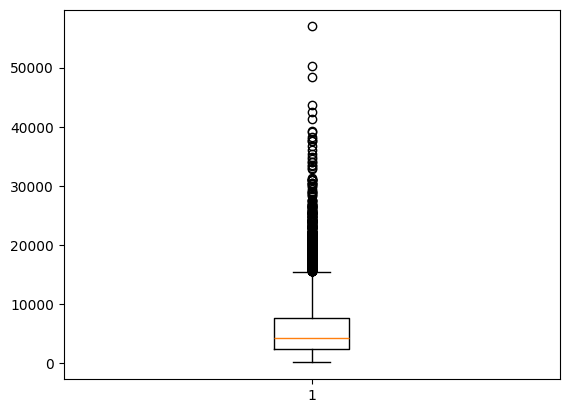

In [40]:
plt.boxplot(cleaned_dataset["cost"]); # Matplotlib prints things while plotting, the semicolon an suppress it.



A boxplot provides a comprehensive view of a dataset's distribution, offering more detailed insights than typical tables. The central line within the box represents the median, splitting the data into its lower and upper halves. The box itself is framed by two lines: the lower boundary represents the 25th percentile (or Q1), meaning 25% of the data lies below this value, and the upper boundary denotes the 75th percentile (or Q3), indicating that 75% of the data is below this point.

The range between Q3 and Q1 is known as the Interquartile Range (IQR). Beyond the box, the plot extends 'whiskers'. Their "distance" is calculated as `1.5 * IQR` both above and below the box, providing a range for typical data points. Any data outside these whiskers can be considered possible outliers.

##### ❓ What other plots would make sense? Make them.

Histograms on age and cost as well.

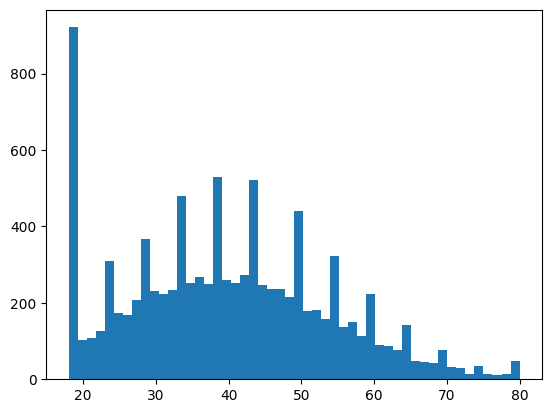

In [41]:
plt.hist(cleaned_dataset["age"], bins=50);

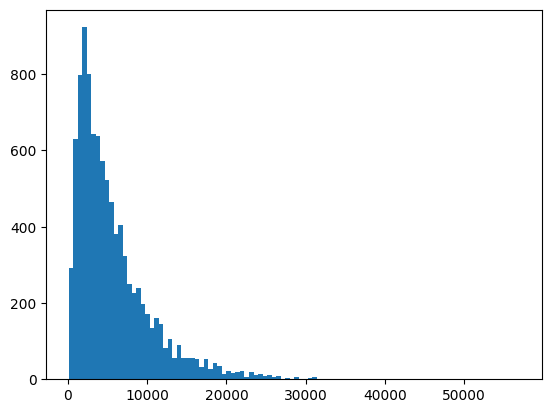

In [42]:
plt.hist(cleaned_dataset["cost"], bins=100);

For categorical data, categories can often serve as a basis for comparison in other plots, like boxplots. This means you can use a single category to differentiate data within such plots. You can also produce the same type of plot multiple times, once for each category, to analyze patterns within individual categories.


| Plot Type     | Description                                          | When to Use                                         |
|---------------|------------------------------------------------------|-----------------------------------------------------|
| **Count Plot**| Represents the frequency or count of each category.  | To see how often each category appears in the data. |